<a href="https://colab.research.google.com/github/amamra-abdenour/Deep_Learning_Python/blob/master/DeepLearning_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.models import load_model
CNN_glg_drive_path = '/content/drive/My Drive/DeepLearning DATA/cats_and_dogs_small_2.h5'

model = load_model(CNN_glg_drive_path)
model.summary()

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
____________________________________

/content/drive/My Drive/DeepLearning DATA/cats_and_dogs_small/test/dogs/dog.1700.jpg
<class 'PIL.Image.Image'>
(150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


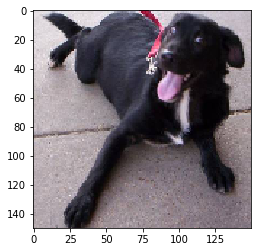

In [17]:
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

#
test_dir = '/content/drive/My Drive/DeepLearning DATA/cats_and_dogs_small/test/'
img_file = os.path.join(test_dir,'dogs/dog.1700.jpg')
print(img_file)
#
img = image.load_img(img_file,target_size=(150,150))
print(type(img))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor /= 255.
print(img_tensor.shape) 
#
plt.imshow(img_tensor[0])

In [0]:
from keras import models
from keras import backend as K


layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model =models.Model(inputs=model.input, outputs= layer_outputs)
activations = activation_model.predict(img_tensor)

In [19]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


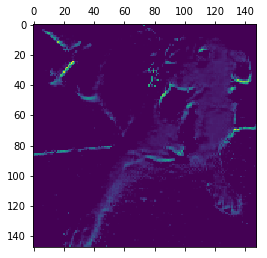

In [20]:
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')

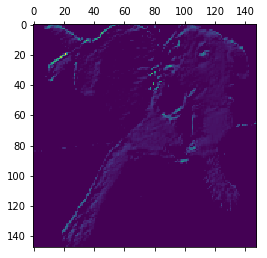

In [21]:
plt.matshow(first_layer_activation[0,:,:,30], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


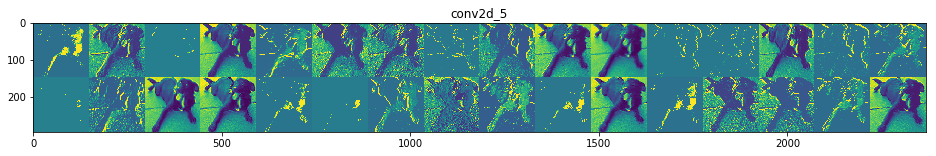

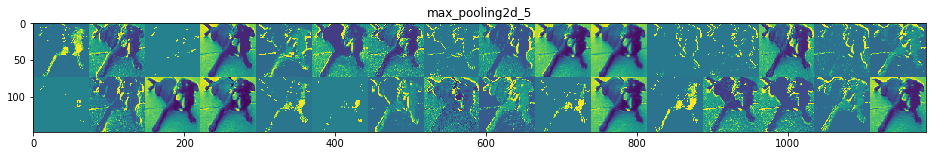

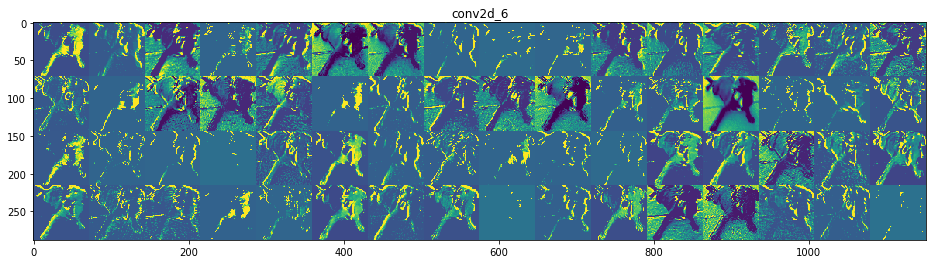

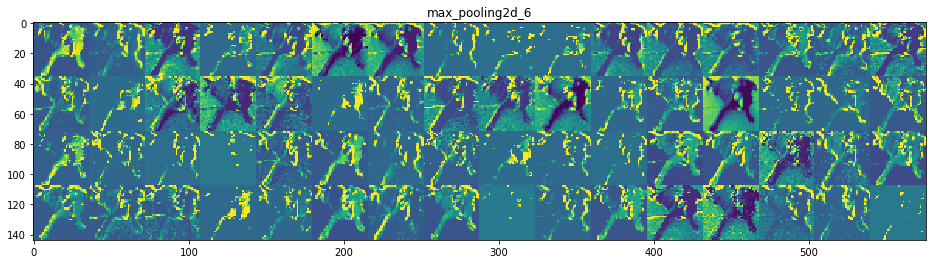

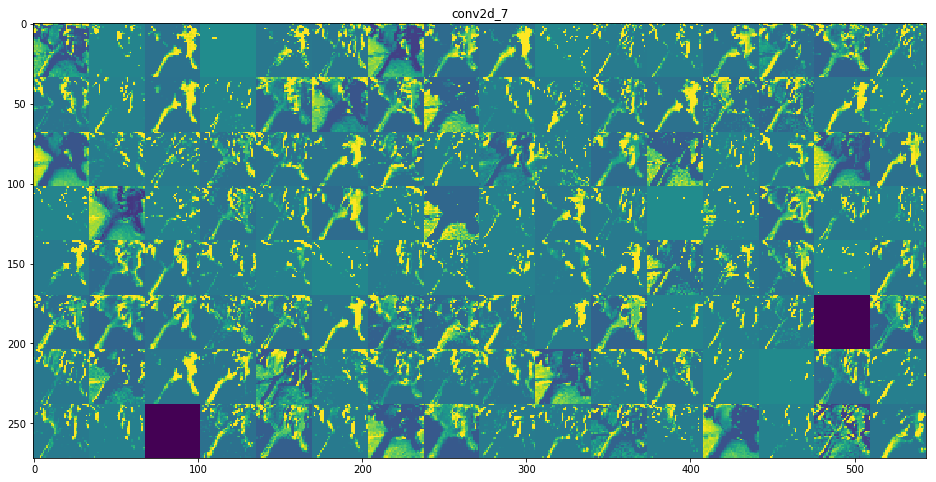

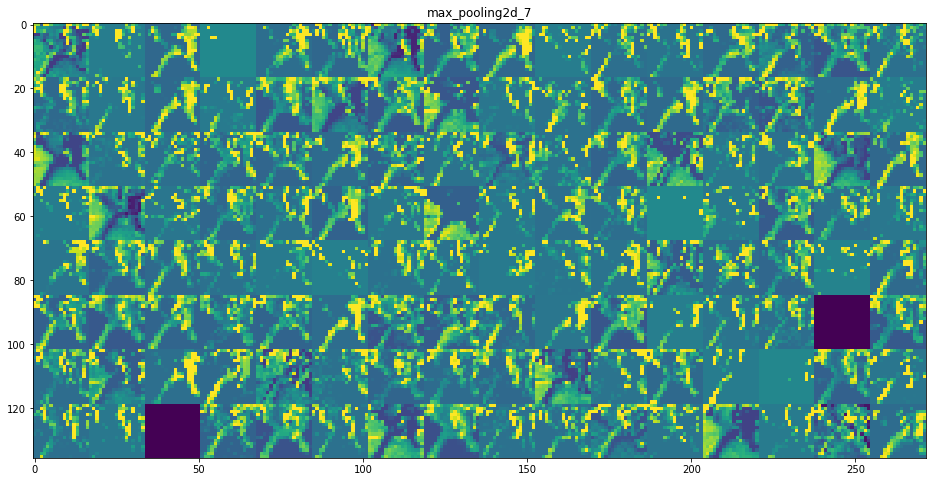

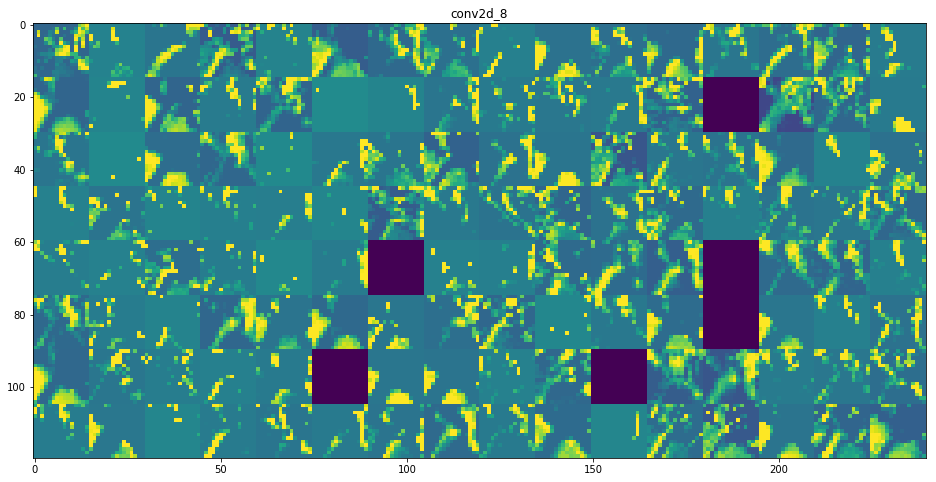

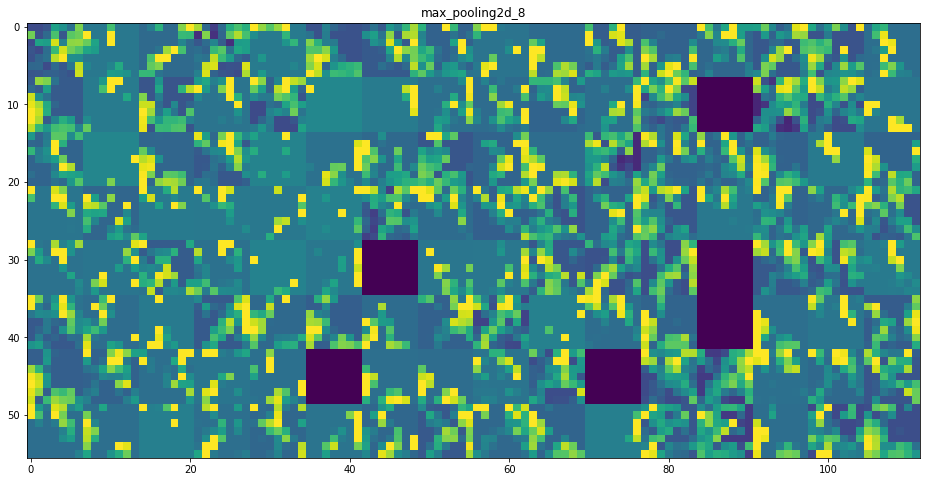

In [22]:
layer_names =[]
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((n_cols * size, images_per_row * size))
  for col in range(n_cols):
    for row in range( images_per_row):
      
      channel_image = layer_activation[0,:,:,col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image,0,255).astype('uint8')
      display_grid [col * size: (col + 1) * size, 
                    row * size :(row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize= (scale* display_grid.shape[1],scale* display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap = 'viridis')

In [11]:
print(len(model.layers))

12


In [47]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top = False)
layer_name = 'block3_conv1'
filter_index = 0
"""
layer_output = model.get_layer(layer_name).output 
loss = K.mean(layer_output[:,:,:,filter_index])

grads = K.gradients(loss, model.input)[0]
grads /=  (K.sqrt(K.mean(K.square(grads))) + 1e-5)  

iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1,150,150,3))])
"""

'\nlayer_output = model.get_layer(layer_name).output \nloss = K.mean(layer_output[:,:,:,filter_index])\n\ngrads = K.gradients(loss, model.input)[0]\ngrads /=  (K.sqrt(K.mean(K.square(grads))) + 1e-5)  \n\niterate = K.function([model.input], [loss, grads])\nimport numpy as np\nloss_value, grads_value = iterate([np.zeros((1,150,150,3))])\n'

In [0]:
input_image_data = np.random((1,150,150,3)) * 20 + 128
step = 1.
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  input_img_data +=  grads_value * step

In [0]:
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1

  x += 0.5
  x = np.clip(x,0,1)  

  x *= 255
  x = np.clip(x,0,255).astype('uint8')

  return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:,:,:,filter_index])
  grads = K.gradients(loss, model.input)[0]
  grads /=  (K.sqrt(K.mean(K.square(grads))) + 1e-5)  
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1,size,size,3)) * 20 + 128
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data +=  grads_value * step
  img = input_img_data[0]
  return deprocess_image(img)


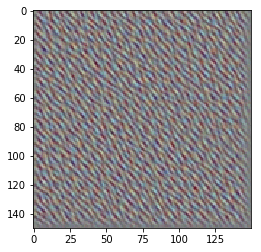

In [48]:
plt.imshow(generate_pattern('block3_conv1', 4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


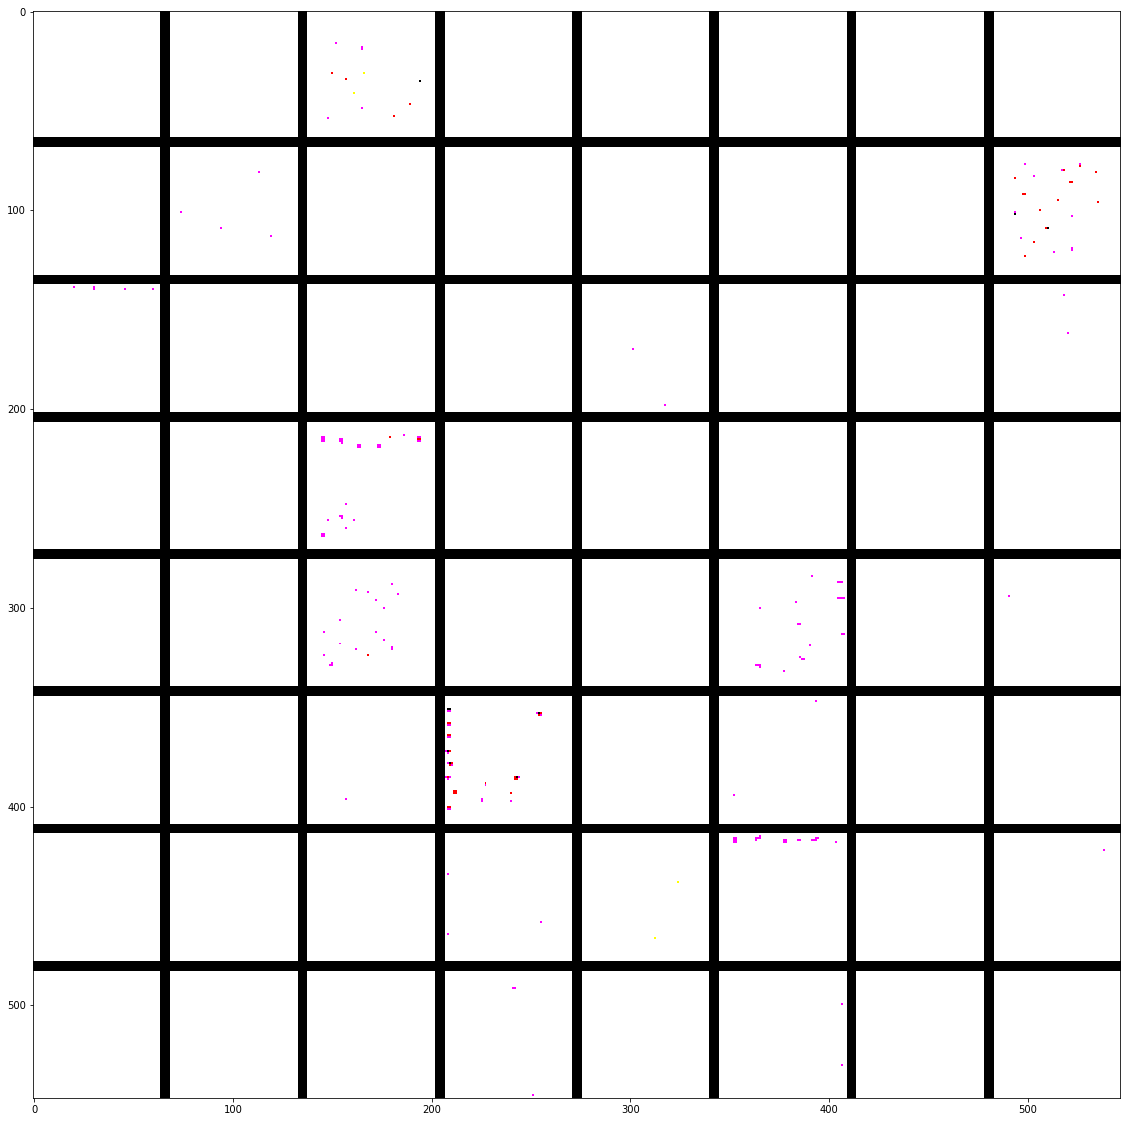

In [49]:
layer_name = 'block3_conv1'
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))
for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size= size)
    horizontal_start = i * (size + margin)
    horizontal_end = horizontal_start +  size 
    vertical_start = j * (size + margin)
    vertical_end = vertical_start + size
    results[horizontal_start : horizontal_end,
            vertical_start : vertical_end, :] = filter_img
plt.figure(figsize=(20,20))
plt.imshow(results)